# Predicting crop yield from soil and fertilizer

Research question¶

"Can crop yields be predicted"
Dataset

https://www.kaggle.com/datasets/yaminh/crop-yield-prediction

## Visualizations

In this section the dataset is loaded into a dataframe to visualize the data and possible correlations between attributes

In [1]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("./dataset-3/yield_df.csv")

# Display dataset info
df.info()

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64


In [3]:
# Rename columns to standardize names
df.rename(columns={
    'Rain Fall (mm)': 'Rainfall_mm',
    'Fertilizer': 'Fertilizer',
    'Temperatue': 'Temperature',
    'Nitrogen (N)': 'Nitrogen',
    'Phosphorus (P)': 'Phosphorus',
    'Potassium (K)': 'Potassium',
    'Yeild (Q/acre)': 'Yield_Q_per_acre'
}, inplace=True)

# Convert Temperature to numeric, handling non-numeric values
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna()

# Verify the cleaned dataset
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rainfall_mm       99 non-null     float64
 1   Fertilizer        99 non-null     float64
 2   Temperature       99 non-null     float64
 3   Nitrogen          99 non-null     float64
 4   Phosphorus        99 non-null     float64
 5   Potassium         99 non-null     float64
 6   Yield_Q_per_acre  99 non-null     float64
dtypes: float64(7)
memory usage: 6.2 KB
None
   Rainfall_mm  Fertilizer  Temperature  Nitrogen  Phosphorus  Potassium  \
0       1230.0        80.0         28.0      80.0        24.0       20.0   
1        480.0        60.0         36.0      70.0        20.0       18.0   
2       1250.0        75.0         29.0      78.0        22.0       19.0   
3        450.0        65.0         35.0      70.0        19.0       18.0   
4       1200.0        80.0         27.0      79.0      

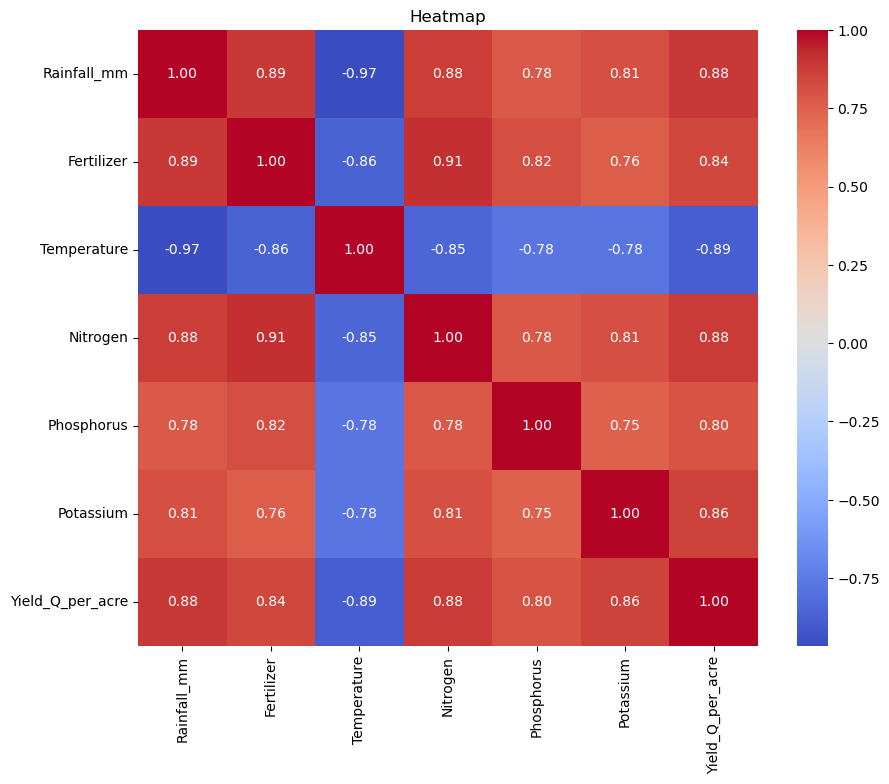

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the subset of the data
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap")
plt.show()

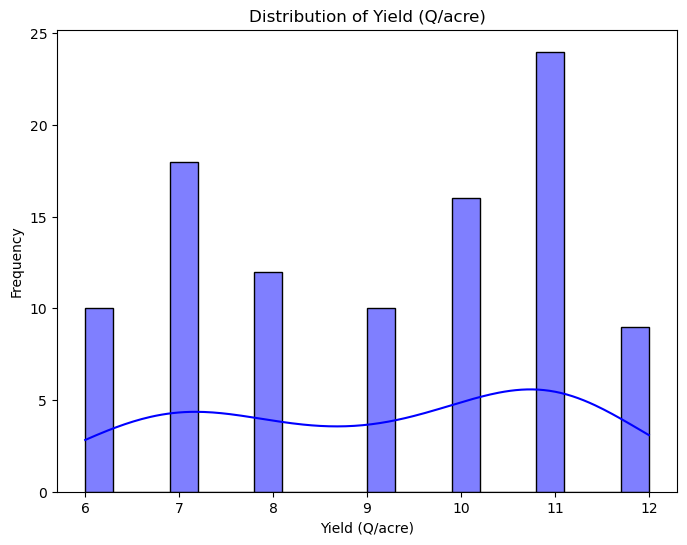

In [11]:
# Distribution plot for the target variable (Yield_Q_per_acre)
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Yield_Q_per_acre'], kde=True, bins=20, color="blue")
plt.title("Distribution of Yield (Q/acre)")
plt.xlabel("Yield (Q/acre)")
plt.ylabel("Frequency")
plt.show()

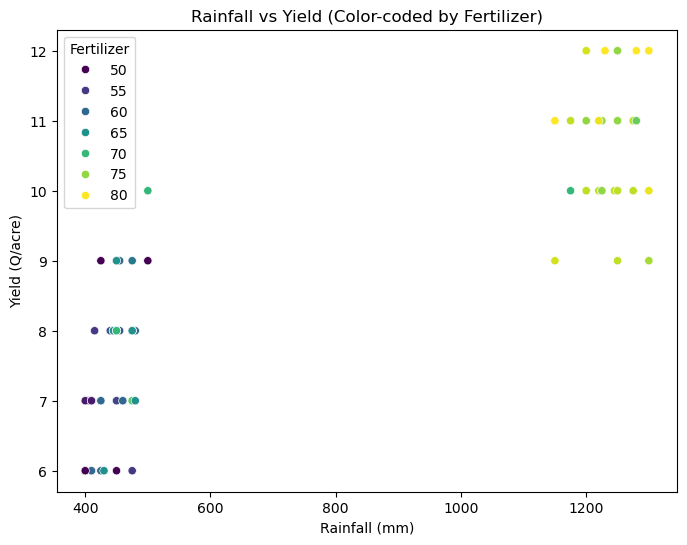

In [12]:
# Scatter plot to see relationships with Yield (e.g., Rainfall_mm vs Yield_Q_per_acre)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Rainfall_mm', y='Yield_Q_per_acre', hue='Fertilizer', palette='viridis')
plt.title("Rainfall vs Yield (Color-coded by Fertilizer)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (Q/acre)")
plt.legend(title='Fertilizer')
plt.show()

C:\Users\Gregor\AppData\Local\Temp\ipykernel_35532\2441819028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Fertilizer', y='Yield_Q_per_acre', palette="Set3")


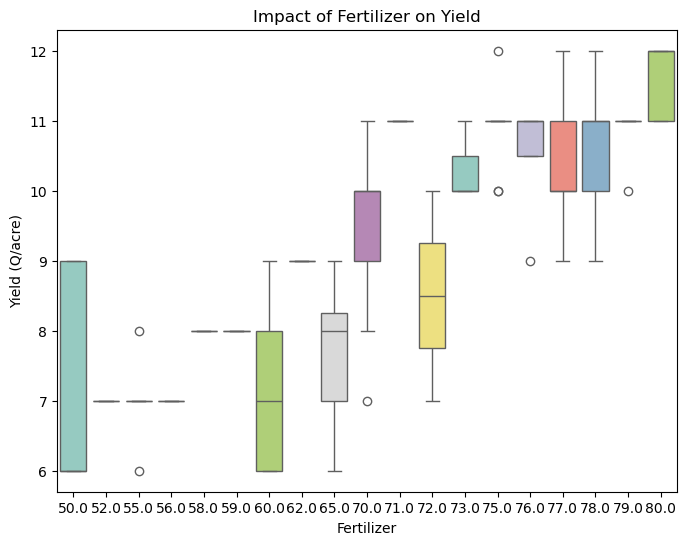

In [13]:
# Boxplot to analyze how Fertilizer levels impact Yield
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Fertilizer', y='Yield_Q_per_acre', palette="Set3")
plt.title("Impact of Fertilizer on Yield")
plt.xlabel("Fertilizer")
plt.ylabel("Yield (Q/acre)")
plt.show()

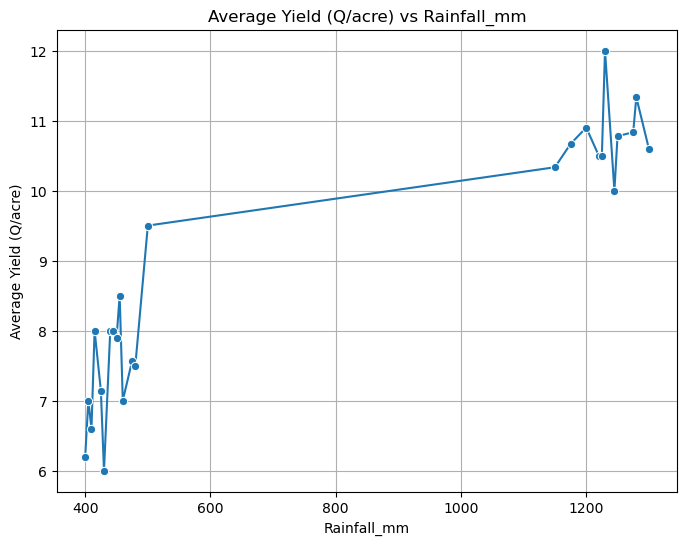

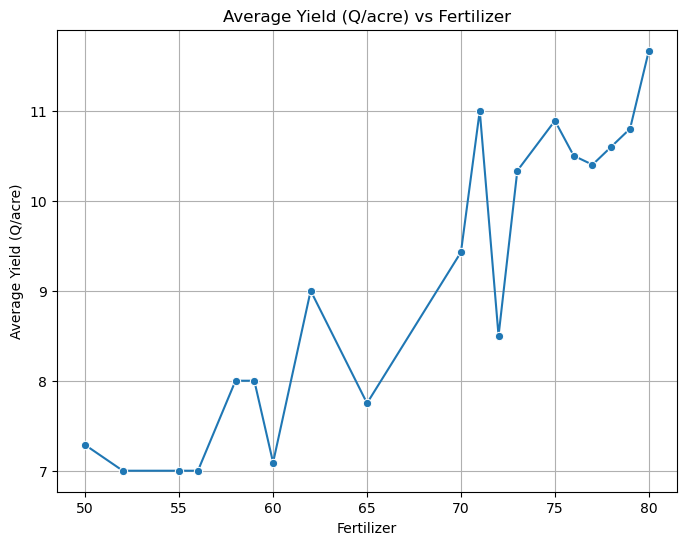

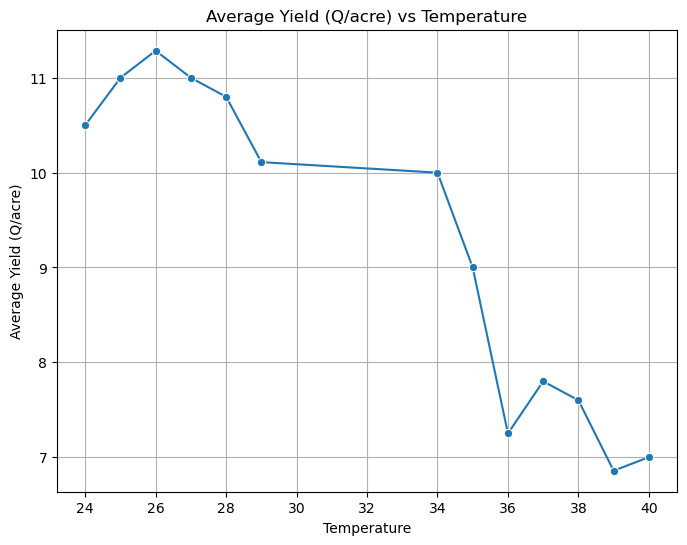

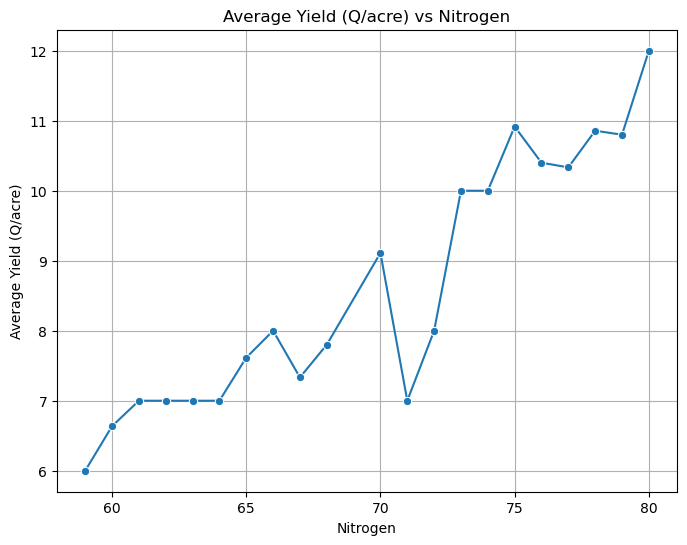

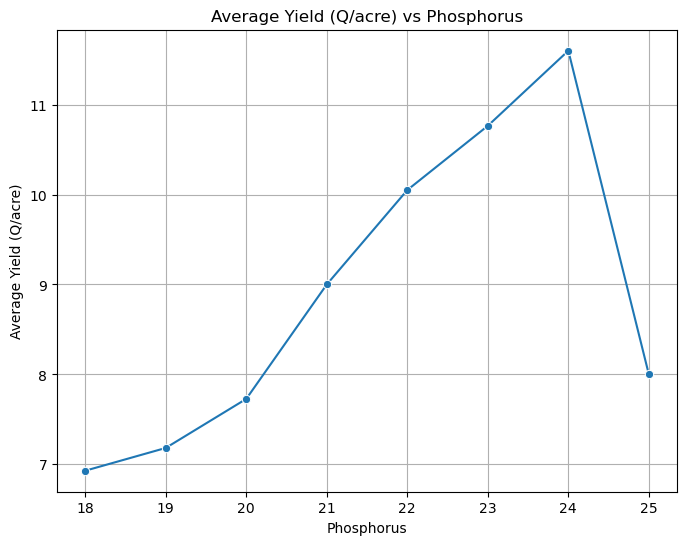

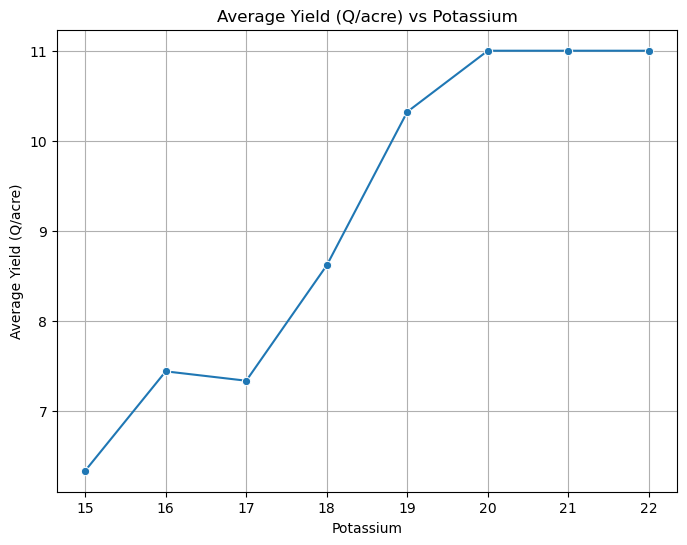

In [16]:
# Line graphs to show the average yield based on different attributes
features = ['Rainfall_mm', 'Fertilizer', 'Temperature', 'Nitrogen', 'Phosphorus', 'Potassium']

for feature in features:
    # Group data by the feature and calculate the mean yield
    avg_yield = df_cleaned.groupby(feature)['Yield_Q_per_acre'].mean().reset_index()
    
    # Plot the line graph
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_yield, x=feature, y='Yield_Q_per_acre', marker='o')
    plt.title(f"Average Yield (Q/acre) vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Yield (Q/acre)")
    plt.grid()
    plt.show()


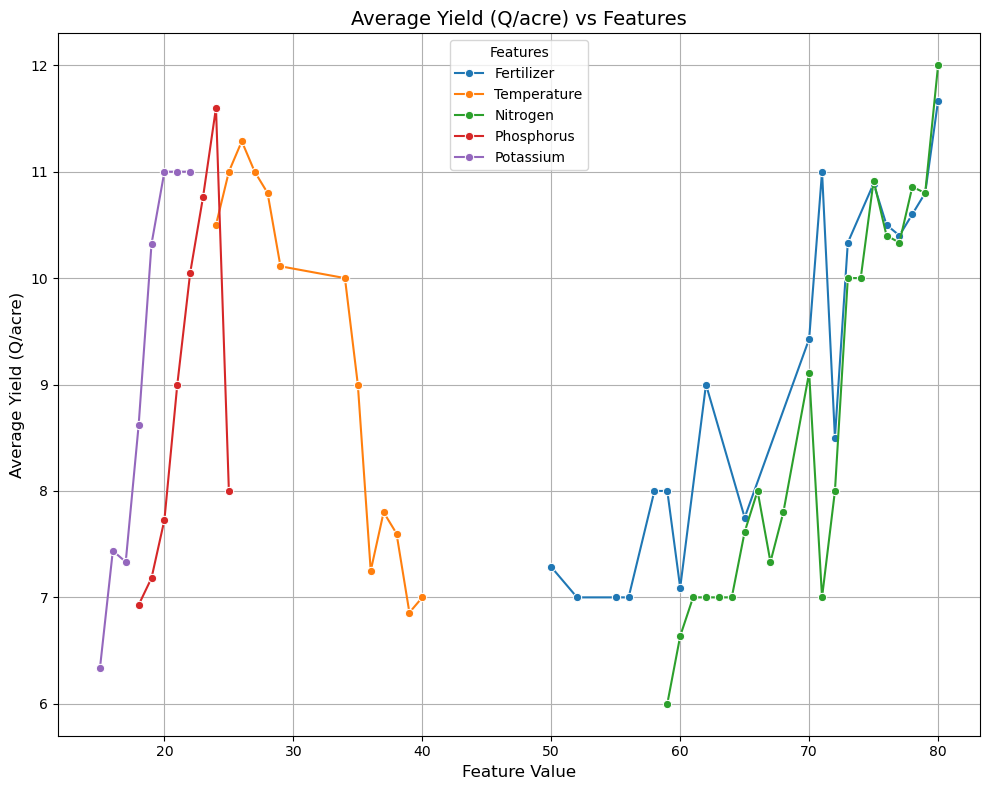

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to plot
features = ['Fertilizer', 'Temperature', 'Nitrogen', 'Phosphorus', 'Potassium']

# Initialize the plot
plt.figure(figsize=(10, 8))

# Loop through each feature and plot on the same graph
for feature in features:
    # Group data by the feature and calculate the mean yield
    avg_yield = df_cleaned.groupby(feature)['Yield_Q_per_acre'].mean().reset_index()
    
    # Plot each feature's line graph
    sns.lineplot(data=avg_yield, x=feature, y='Yield_Q_per_acre', marker='o', label=feature)

# Customize the plot
plt.title("Average Yield (Q/acre) vs Features", fontsize=14)
plt.xlabel("Feature Value", fontsize=12)
plt.ylabel("Average Yield (Q/acre)", fontsize=12)
plt.legend(title="Features", loc='upper center')
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()


## Auto ML with AutoGluon

In [19]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Load the original dataset
train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Train the AutoGluon model on the full dataset
predictor_full = TabularPredictor(label='Yield_Q_per_acre').fit(train_data)

# Evaluate the model
performance_full = predictor_full.evaluate(test_data)

# Print performance metrics
print("Model Performance (Full Dataset):", performance_full)


No path specified. Models will be saved in: "AutogluonModels\ag-20250123_055459"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          32
Memory Avail:       15.39 GB / 31.77 GB (48.4%)
Disk Space Avail:   290.39 GB / 1862.20 GB (15.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'      

Model Performance (Full Dataset): {'accuracy': 0.5, 'balanced_accuracy': 0.5793650793650796, 'mcc': 0.4321208107251123}


Computing feature importance via permutation shuffling for 6 features using 20 rows with 5 shuffle sets...
	1.36s	= Expected runtime (0.27s per shuffle set)
	0.28s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance (Full Dataset):
                importance    stddev   p_value  n  p99_high   p99_low
Potassium    1.600000e-01  0.022361  0.000045  5  0.206041  0.113959
Nitrogen     1.500000e-01  0.093541  0.011525  5  0.342603 -0.042603
Phosphorus   3.000000e-02  0.075829  0.213159  5  0.186132 -0.126132
Temperature  0.000000e+00  0.061237  0.500000  5  0.126088 -0.126088
Rainfall_mm -2.220446e-17  0.050000  0.500000  5  0.102951 -0.102951
Fertilizer  -1.000000e-02  0.134164  0.562141  5  0.266246 -0.286246


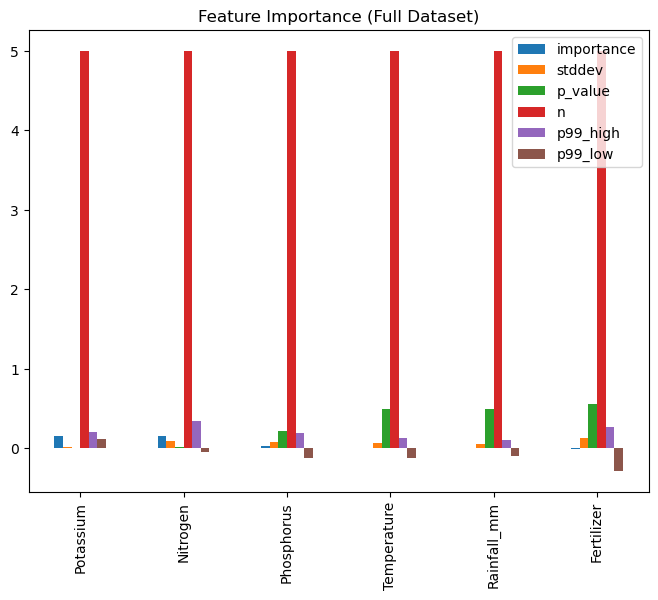

In [20]:
# Feature importance for the full dataset
feature_importance_full = predictor_full.feature_importance(test_data)
print("Feature Importance (Full Dataset):\n", feature_importance_full)

# Plot feature importance
feature_importance_full.plot(kind='bar', figsize=(8, 6), title="Feature Importance (Full Dataset)")
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_predictor(predictor, test_data, label_col):
    # Make predictions
    predictions = predictor.predict(test_data)
    true_values = test_data[label_col].values
    
    # Compute metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(true_values, predictions)
    accuracy = 100 - (mae / true_values.mean()) * 100  # Example of a percentage accuracy for regression
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy (%)': accuracy
    }

# Evaluate all predictors
metrics_full = evaluate_predictor(predictor_full, test_data, 'Yield_Q_per_acre')

# Display results
import pandas as pd
metrics_df = pd.DataFrame({
    'Full Dataset Model': metrics_full,
})

# Display metrics table
print(metrics_df)


              Full Dataset Model
MAE                     0.550000
MSE                     0.650000
RMSE                    0.806226
R²                      0.856828
Accuracy (%)           94.270833
